In [6]:
%matplotlib inline
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tnrange, tqdm_notebook

import matplotlib
matplotlib.rcParams.update({'font.size': 18})
sns.set_style("whitegrid")

In [2]:
wd = '/home/elvannostrand/data/ENCODE/integrated_paper/DEseq_fulloutput/all_overlap_files/'
out_dir = '/home/bay001/projects/encode/analysis/integrated_cdf_plots-3/'
all_CDS = glob.glob(os.path.join(wd,'*l2cutoff_CDS.txt'))
all_3utr = glob.glob(os.path.join(wd,'*l2cutoff_3utr.txt'))
all_5utr = glob.glob(os.path.join(wd,'*l2cutoff_5utr.txt'))

print('len cds: {}'.format(len(all_CDS)))
print('len 3utr: {}'.format(len(all_3utr)))
print('len 5utr: {}'.format(len(all_5utr)))

len cds: 156
len 3utr: 156
len 5utr: 156


In [3]:
NAMES = ['gene','category','l2fc']
label_dict = {
    1:'>= 16-fold (n = N)',
    2:'4 to 16-fold (n = N)',
    3:'2 to 4-fold (n = N)',
    4:'1 to 2-fold (n = N)',
    5:'depleted (n = N)'
}

In [35]:
num_bins = 100

colors = sns.color_palette("hls", 8)

def hack(row):
    return max(-3.1, min(row['l2fc'], 3.1))

def plot_cdf(f, out_file):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7.5,7.5))
        
    df = pd.read_table(f, names=NAMES)
    # return df
    for i in range(1, 6):
        dfx = df[df['category']==i]# .fillna(0)
        if not dfx.shape[0] == 0:
            dfx['l2fc fixed'] = dfx.apply(hack, axis=1)
            n, bins, patches = plt.hist(
                dfx['l2fc fixed'], 
                normed=True, 
                cumulative=True, 
                histtype='step', 
                color=colors[i], 
                alpha=0, 
                bins=num_bins, 
            )
            if i == 1:
                print(bins, n)
                print(dfx.shape)
                return dfx
            ax.plot(bins[1:], n, color=colors[i], label=label_dict[i].replace('N','{}'.format(dfx.shape[0])))
            nice_name = os.path.basename(f)
            nice_name = nice_name.replace('_ReadsByLoc_combined.csv.l2fcwithpval_enr.csv.01_02_overlap_l2cutoff_',' - ')
            nice_name = nice_name.replace('.txt','')
            ax.set_title(nice_name.upper(), fontsize=16)
            ax.set_xlabel("Gene expression log2 fold change")
            ax.set_ylabel("Cumulative fraction of genes")
            ax.set_ylim(0, 1)
            ax.set_xlim(-3, 3)
    plt.legend(fontsize=13, title='eCLIP log2\nfold enrichment')
    plt.savefig(out_file)
    return dfx

In [25]:
progress = tnrange(len(all_CDS), desc='all cds')

for cds in all_CDS:
    out_file = os.path.join(out_dir, os.path.basename(cds) + '.png')
    plot_cdf(cds, out_file)
    progress.update(1)

progress = tnrange(len(all_3utr), desc='all 3utr')
for utr in all_3utr:
    out_file = os.path.join(out_dir, os.path.basename(utr) + '.png')
    plot_cdf(utr, out_file)
    progress.update(1)
progress = tnrange(len(all_5utr), desc='all 5utr')
for utr in all_5utr:
    out_file = os.path.join(out_dir, os.path.basename(utr) + '.png')
    plot_cdf(utr, out_file)
    progress.update(1)

Widget Javascript not detected.  It may not be installed or enabled properly.


/home/bay001/anaconda2/envs/brian/lib/python2.7/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
Widget Javascript not detected.  It may not be installed or enabled properly.


Widget Javascript not detected.  It may not be installed or enabled properly.


/home/bay001/anaconda2/envs/brian/lib/python2.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


(array([-0.49175439, -0.47968034, -0.4676063 , -0.45553225, -0.4434582 ,
       -0.43138415, -0.4193101 , -0.40723606, -0.39516201, -0.38308796,
       -0.37101391, -0.35893986, -0.34686582, -0.33479177, -0.32271772,
       -0.31064367, -0.29856963, -0.28649558, -0.27442153, -0.26234748,
       -0.25027343, -0.23819939, -0.22612534, -0.21405129, -0.20197724,
       -0.1899032 , -0.17782915, -0.1657551 , -0.15368105, -0.141607  ,
       -0.12953296, -0.11745891, -0.10538486, -0.09331081, -0.08123677,
       -0.06916272, -0.05708867, -0.04501462, -0.03294057, -0.02086653,
       -0.00879248,  0.00328157,  0.01535562,  0.02742967,  0.03950371,
        0.05157776,  0.06365181,  0.07572586,  0.0877999 ,  0.09987395,
        0.111948  ,  0.12402205,  0.1360961 ,  0.14817014,  0.16024419,
        0.17231824,  0.18439229,  0.19646633,  0.20854038,  0.22061443,
        0.23268848,  0.24476253,  0.25683657,  0.26891062,  0.28098467,
        0.29305872,  0.30513277,  0.31720681,  0.32928086,  0.3

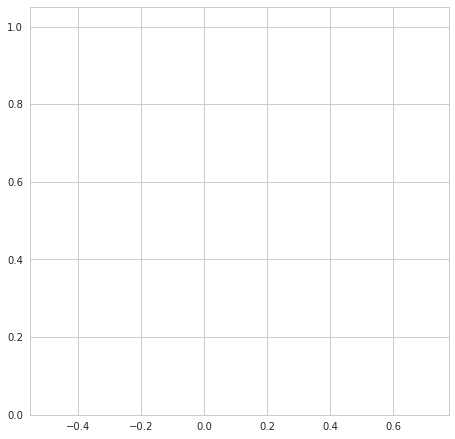

In [36]:
out_file = '/home/bay001/test.png'
f = '/home/elvannostrand/data/ENCODE/integrated_paper/DEseq_fulloutput/all_overlap_files/285_TIA1_ReadsByLoc_combined.csv.l2fcwithpval_enr.csv.01_02_overlap_l2cutoff_5utr.txt'
dx = plot_cdf(f, out_file)

In [37]:
# so anything less than -3, set to -3.1 and > 3 to +3
# make tickmarks bigger
dx[dx['category']==1]

,gene,category,l2fc,l2fc fixed
1650,ENSG00000148516.17,1,-0.491754,-0.491754
3853,ENSG00000101152.6,1,0.715650,0.715650


In [23]:
dx

,gene,category,l2fc,l2fc fixed
0,ENSG00000166224.12,5,-0.032150,-0.032150
1,ENSG00000168175.10,5,-0.102081,-0.102081
3,ENSG00000143479.11,5,-0.262903,-0.262903
5,ENSG00000080371.4,5,-0.511995,-0.511995
6,ENSG00000182158.10,5,0.089388,0.089388
7,ENSG00000149781.8,5,1.149285,1.149285
8,ENSG00000039560.9,5,-0.435258,-0.435258
9,ENSG00000162032.11,5,1.386054,1.386054
10,ENSG00000135709.8,5,0.655507,0.655507
11,ENSG00000106443.10,5,-0.436030,-0.436030
